# Exercise 4

## Building a Regression MLP Using the Sequential API

### Importing the packages

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tf.__version__

'2.14.0'

### Loading data

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Creating the model using the Sequential API

In [4]:
# 1 hidden layer with 20 neurons
model1 = Sequential()
model1.add(Dense(20, activation="relu", input_shape=X_train.shape[1:]))
model1.add(Dense(1))

In [5]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


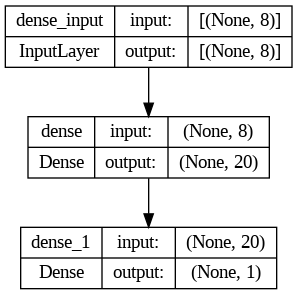

In [6]:
keras.utils.plot_model(model1, show_shapes=True)

In [7]:
# 1 hidden layer with 40 neurons
model2 = Sequential()
model2.add(Dense(40, activation="relu", input_shape=X_train.shape[1:]))
model2.add(Dense(1))

In [8]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 40)                360       
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


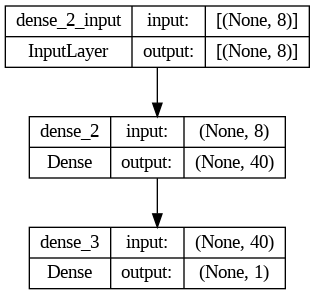

In [9]:
keras.utils.plot_model(model2, show_shapes=True)

In [10]:
# 2 hidden layers, the first layer with 20 neurons and the second layer with 20 neurons
model3 = Sequential()
model3.add(Dense(20, activation="relu", input_shape=X_train.shape[1:]))
model3.add(Dense(20, activation="relu"))
model3.add(Dense(1))

In [11]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                180       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 621 (2.43 KB)
Trainable params: 621 (2.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


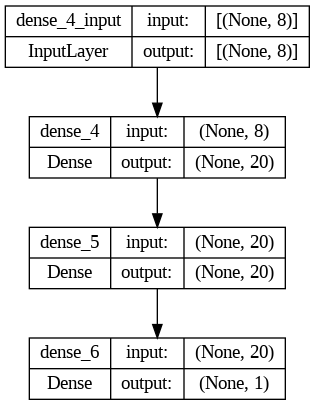

In [12]:
keras.utils.plot_model(model3, show_shapes=True)

### Compiling the model

In [13]:
model1.compile(loss="mean_squared_error", optimizer="sgd")
model2.compile(loss="mean_squared_error", optimizer="sgd")
model3.compile(loss="mean_squared_error", optimizer="sgd")

### Fitting the model

In [14]:
history1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
history3 = model3.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 0.8537 - val_loss: 40.6632
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5847 - val_loss: 0.4220
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4279 - val_loss: 0.3879
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4168 - val_loss: 0.3849
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.4074 - val_loss: 0.4082
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4072 - val_loss: 0.4064
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3964 - val_loss: 0.4003
Epoch 8/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3903 - val_loss: 0.4160
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3897 - val_loss: 0.4163
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3858 - val_loss: 0.400

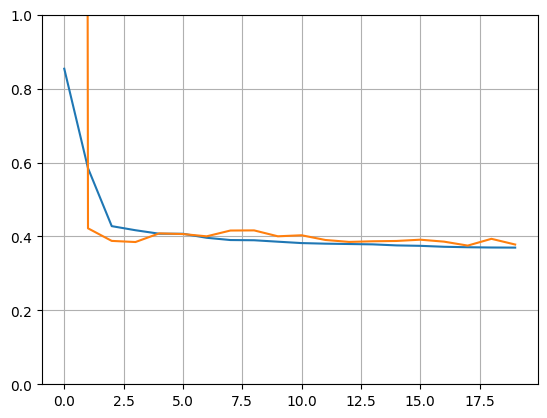

In [15]:
plt.plot(pd.DataFrame(history1.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

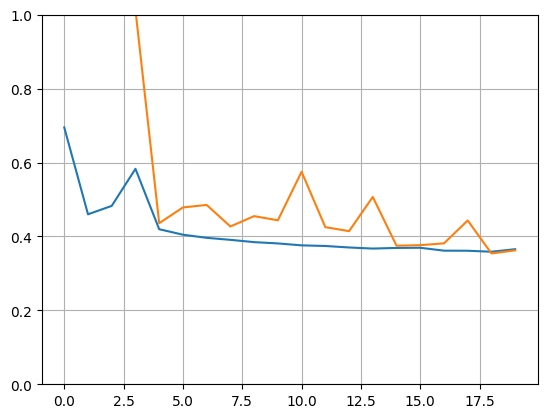

In [16]:
plt.plot(pd.DataFrame(history2.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

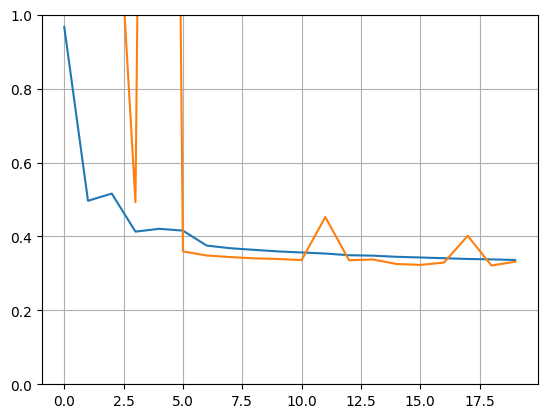

In [17]:
plt.plot(pd.DataFrame(history3.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
print('The value of the last validation loss of Model 1: ', round(history1.history['val_loss'][-1], 4))
print('The value of the last validation loss of Model 2: ', round(history2.history['val_loss'][-1], 4))
print('The value of the last validation loss of Model 3: ', round(history3.history['val_loss'][-1], 4))

The value of the last validation loss of Model 1:  0.3781
The value of the last validation loss of Model 2:  0.3623
The value of the last validation loss of Model 3:  0.3315


### Evaluating the model

In [19]:
mse_test = model3.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3360


### Using the model to make predictions

In [20]:
X_new = X_test[:3]
y_pred = model3.predict(X_new)

1/1 [==============================] - 0s 145ms/step


In [21]:
y_pred

array([[0.4344771],
       [1.6442174],
       [4.3841324]], dtype=float32)